In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./train.zip')

In [89]:
Pickup_cord = data[['pickup_longitude','pickup_latitude']].values
Dropoff_cord = data[['dropoff_longitude','dropoff_latitude']].values
locations = np.concatenate([Pickup_cord,Dropoff_cord])
print locations.shape
print data.shape

(2917288, 2)
(1458644, 11)


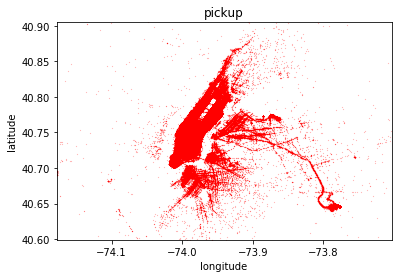

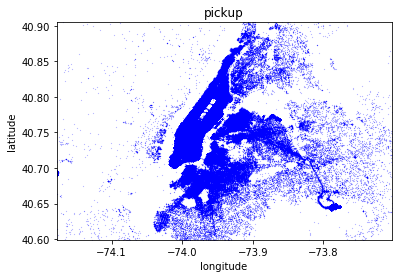

In [8]:
plt.title('pickup')
plt.xlabel('longitude');plt.ylabel('latitude')
plt.plot(Pickup_cord[:,0],Pickup_cord[:,1],'ro',markersize=0.1)
plt.xlim(np.percentile(Pickup_cord[:,0],0.01),np.percentile(Pickup_cord[:,0],99.99))
plt.ylim(np.percentile(Pickup_cord[:,1],0.01),np.percentile(Pickup_cord[:,1],99.99))
plt.show()
plt.title('pickup')
plt.xlabel('longitude');plt.ylabel('latitude')
plt.plot(Dropoff_cord[:,0],Dropoff_cord[:,1],'bo',markersize=0.1)
plt.xlim(np.percentile(Pickup_cord[:,0],0.01),np.percentile(Pickup_cord[:,0],99.99))
plt.ylim(np.percentile(Pickup_cord[:,1],0.01),np.percentile(Pickup_cord[:,1],99.99))
plt.show()

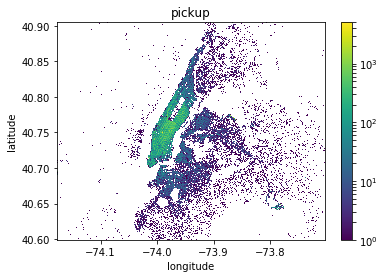

In [9]:
import matplotlib
plt.title('pickup')
plt.xlabel('longitude');plt.ylabel('latitude')
binx = np.linspace(np.percentile(Pickup_cord[:,0],0.01),np.percentile(Pickup_cord[:,0],99.99),501)
biny = np.linspace(np.percentile(Pickup_cord[:,1],0.01),np.percentile(Pickup_cord[:,1],99.99),501)
bins=[binx,biny]
a=plt.hist2d(Dropoff_cord[:,0],Dropoff_cord[:,1],bins=bins,norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

In [53]:
from sklearn import cluster
import pickle
if False:
    kmeans = cluster.MiniBatchKMeans(n_clusters=300,batch_size=300000, verbose=1).fit(locations)
    predictions = kmeans.predict(locations)

    # It is important to use binary access
    with open('km.pickle', 'wb') as f:
        pickle.dump(kmeans, f)


with open('km.pickle', 'rb') as f:
    kmeans = pickle.load(f)

Init 1/3 with method: k-means++
Inertia for init 1/3: 72.444941
Init 2/3 with method: k-means++
Inertia for init 2/3: 26.038795
Init 3/3 with method: k-means++
Inertia for init 3/3: 31.915643
Minibatch iteration 1/1000: mean batch inertia: 0.000296, ewa inertia: 0.000296 
Minibatch iteration 2/1000: mean batch inertia: 0.000058, ewa inertia: 0.000247 
Minibatch iteration 3/1000: mean batch inertia: 0.000073, ewa inertia: 0.000212 
Minibatch iteration 4/1000: mean batch inertia: 0.000038, ewa inertia: 0.000176 
Minibatch iteration 5/1000: mean batch inertia: 0.000073, ewa inertia: 0.000155 
Minibatch iteration 6/1000: mean batch inertia: 0.000100, ewa inertia: 0.000143 
Minibatch iteration 7/1000: mean batch inertia: 0.000041, ewa inertia: 0.000122 
Minibatch iteration 8/1000: mean batch inertia: 0.000042, ewa inertia: 0.000106 
Minibatch iteration 9/1000: mean batch inertia: 0.000012, ewa inertia: 0.000087 
Minibatch iteration 10/1000: mean batch inertia: 0.000015, ewa inertia: 0.00007

In [90]:
data['Cluster_pickup'] = predictions[:len(data)]
data['Cluster_dropoff'] = predictions[len(data):]

In [55]:
from collections import Counter
z=Counter(predictions)

In [94]:
clusters = [i for i in z if z[i]<500]
data_cleaned = data[~(data['Cluster_pickup'].isin(clusters) | data['Cluster_dropoff'].isin(clusters))]
print 1.*len(data_cleaned)/len(data)

0.999220508911


In [95]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [104]:
transition_mat = np.zeros((300,300))
alls = data_cleaned[['Cluster_pickup','Cluster_dropoff']].values
for i in range(len(data_cleaned)) :
    if i%100000==0:
        print i
    a,b =alls[i]
    transition_mat[a,b] += 1

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [109]:
U,D,V = np.linalg.svd(transition_mat)

In [165]:
np.sum(D[:5])/np.sum(D)

0.28735064560434287

In [166]:
num = 3
U2 = U[:,:num]
D2 = D[:num]
V2 = V[:num,:]

In [167]:
print np.mean((transition_mat-np.matmul(np.matmul(U2,np.diag(D2)),V2))**2)

280.08634081806093


(array([295.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


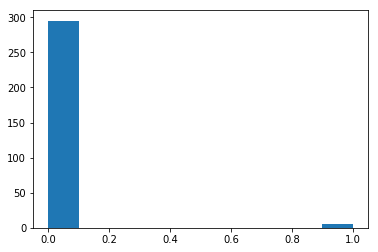

In [75]:
print plt.hist([1*(z[i]<500) for i in z]);plt.show()

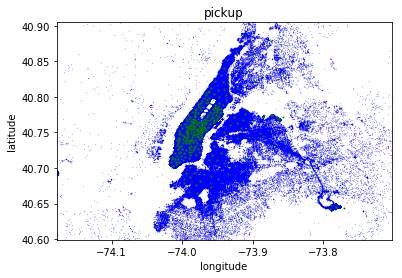

In [64]:

plt.title('pickup')
plt.xlabel('longitude');plt.ylabel('latitude')
plt.plot(Dropoff_cord[:,0],Dropoff_cord[:,1],'bo',markersize=0.1)
plt.xlim(np.percentile(Pickup_cord[:,0],0.01),np.percentile(Pickup_cord[:,0],99.99))
plt.ylim(np.percentile(Pickup_cord[:,1],0.01),np.percentile(Pickup_cord[:,1],99.99))
for i in range(300):
    #print (np.log10(z[i]))
    plt.plot(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],'go',markersize=np.log10(z[i])/3)
plt.show()

In [67]:
import gmplot
gmap = gmplot.GoogleMapPlotter(np.median(Pickup_cord[:,0]), np.median(Pickup_cord[:,1]), 10)

# Overlay our datapoints onto the map
gmap.heatmap(Pickup_cord[::10,0], Pickup_cord[::10,1])

# Generate the heatmap into an HTML file
gmap.draw("my_heatmap.html")

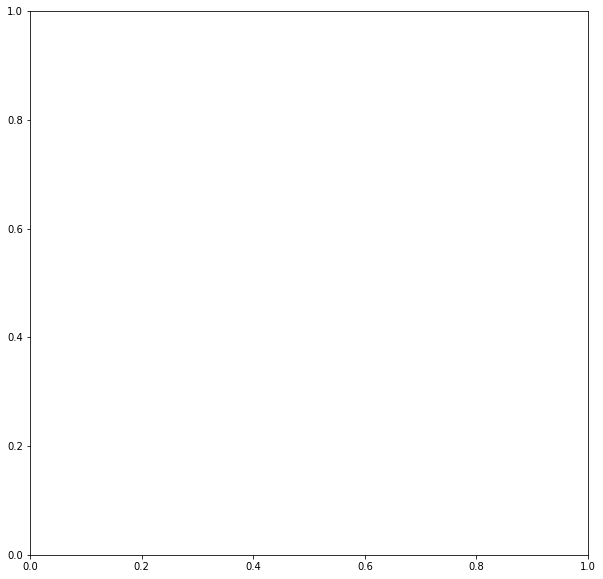

In [70]:
import geopandas as gpd
fig,ax= plt.subplots(1,1,figsize=(10,10))